In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('../..')

In [3]:
squadv2_dev_categories = pd.read_csv('data/processed/squadv2_dev_categories.csv')
print(squadv2_dev_categories.shape)
squadv2_dev_categories.head()

(11873, 13)


,answers,context,id,question,title,answer_start,text,unanswerable,answer_type,answer_length_bin,w6h_label,context_length_bin,question_length_bin
0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9628,In what country is Normandy located?,Normans,"[159, 159, 159, 159]","['France', 'France', 'France', 'France']",0,Location,1,other,100-150,5-10
1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9629,When were the Normans in Normandy?,Normans,"[94, 87, 94, 94]","['10th and 11th centuries', 'in the 10th and 1...",0,Date,4,when,100-150,5-10
2,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962a,From which countries did the Norse originate?,Normans,"[256, 256, 256, 256]","['Denmark, Iceland and Norway', 'Denmark, Icel...",0,Location,4,other,100-150,5-10
3,"{'answer_start': [308, 308, 308, 308], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962b,Who was the Norse leader?,Normans,"[308, 308, 308, 308]","['Rollo', 'Rollo', 'Rollo', 'Rollo']",0,Person,1,who,100-150,0-5
4,"{'answer_start': [671, 649, 671, 671], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962c,What century did the Normans first gain their ...,Normans,"[671, 649, 671, 671]","['10th century', 'the first half of the 10th c...",0,Other Numeric,1,what,100-150,5-10


SQuADv2 % unanswerable by category -> May explain dips for certain categories

In [4]:
category_to_full_name = {
    'w6h_label': 'Question type',
    'context_length_bin': 'Context length',
    'question_length_bin': 'Question length',
    'answer_length_bin': 'Answer length',
    'answer_type': 'Answer type'
}

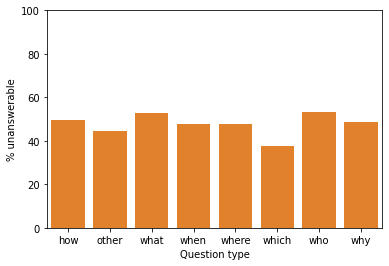

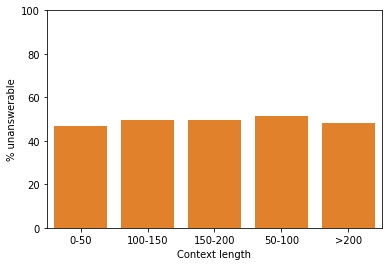

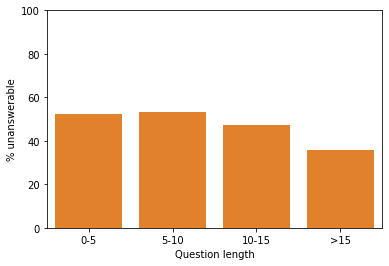

In [5]:
for category in ['w6h_label', 'context_length_bin', 'question_length_bin']:
    
    df = squadv2_dev_categories.groupby(category).mean()
    if category == 'question_length_bin':
        df = df.reindex(['0-5', '5-10', '10-15', '>15'])
    
    sns.barplot(
        x=df.index, 
        y=df['unanswerable']*100,
        color='tab:orange',
    )
    plt.xlabel(category_to_full_name[category])
    plt.ylabel('% unanswerable')
    plt.ylim(0, 100)
    plt.show()

- % of each category label in training set for SQuADv1.1 and SQuADv2 -> May explain ordering i.e. performance on rare classes is worse
    - For SQuADv2 can split bar based on number answerable and unanswerable

In [6]:
squadv1_train_categories = pd.read_csv('data/processed/squadv1_train_categories.csv')
print(squadv1_train_categories.shape)
squadv1_train_categories.head()

(87599, 12)


,answers,context,id,question,title,answer_start,text,answer_type,answer_length_bin,w6h_label,context_length_bin,question_length_bin
0,"{'answer_start': [515], 'text': ['Saint Bernad...","Architecturally, the school has a Catholic cha...",5733be284776f41900661182,To whom did the Virgin Mary allegedly appear i...,University_of_Notre_Dame,[515],['Saint Bernadette Soubirous'],Person,3,other,100-150,10-15
1,"{'answer_start': [188], 'text': ['a copper sta...","Architecturally, the school has a Catholic cha...",5733be284776f4190066117f,What is in front of the Notre Dame Main Building?,University_of_Notre_Dame,[188],['a copper statue of Christ'],Other Entity,5,what,100-150,5-10
2,"{'answer_start': [279], 'text': ['the Main Bui...","Architecturally, the school has a Catholic cha...",5733be284776f41900661180,The Basilica of the Sacred heart at Notre Dame...,University_of_Notre_Dame,[279],['the Main Building'],Other Entity,3,other,100-150,10-15
3,"{'answer_start': [381], 'text': ['a Marian pla...","Architecturally, the school has a Catholic cha...",5733be284776f41900661181,What is the Grotto at Notre Dame?,University_of_Notre_Dame,[381],['a Marian place of prayer and reflection'],Other Entity,7,what,100-150,5-10
4,"{'answer_start': [92], 'text': ['a golden stat...","Architecturally, the school has a Catholic cha...",5733be284776f4190066117e,What sits on top of the Main Building at Notre...,University_of_Notre_Dame,[92],['a golden statue of the Virgin Mary'],Other Entity,7,what,100-150,10-15


In [7]:
squadv2_train_categories = pd.read_csv('data/processed/squadv2_train_categories.csv')
print(squadv2_train_categories.shape)
squadv2_train_categories.head()

(130319, 13)


,answers,context,id,question,title,answer_start,text,unanswerable,answer_type,answer_length_bin,w6h_label,context_length_bin,question_length_bin
0,"{'answer_start': [269], 'text': ['in the late ...",Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56be85543aeaaa14008c9063,When did Beyonce start becoming popular?,Beyoncé,[269],['in the late 1990s'],0,Other Numeric,4,when,100-150,5-10
1,"{'answer_start': [207], 'text': ['singing and ...",Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56be85543aeaaa14008c9065,What areas did Beyonce compete in when she was...,Beyoncé,[207],['singing and dancing'],0,Common Noun Phrase,3,what,100-150,10-15
2,"{'answer_start': [526], 'text': ['2003']}",Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56be85543aeaaa14008c9066,When did Beyonce leave Destiny's Child and bec...,Beyoncé,[526],['2003'],0,Other Numeric,1,when,100-150,10-15
3,"{'answer_start': [166], 'text': ['Houston, Tex...",Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56bf6b0f3aeaaa14008c9601,In what city and state did Beyonce grow up?,Beyoncé,[166],"['Houston, Texas']",0,Location,2,other,100-150,5-10
4,"{'answer_start': [276], 'text': ['late 1990s']}",Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56bf6b0f3aeaaa14008c9602,In which decade did Beyonce become famous?,Beyoncé,[276],['late 1990s'],0,Other Numeric,2,other,100-150,5-10


### SQuAD 2 development set

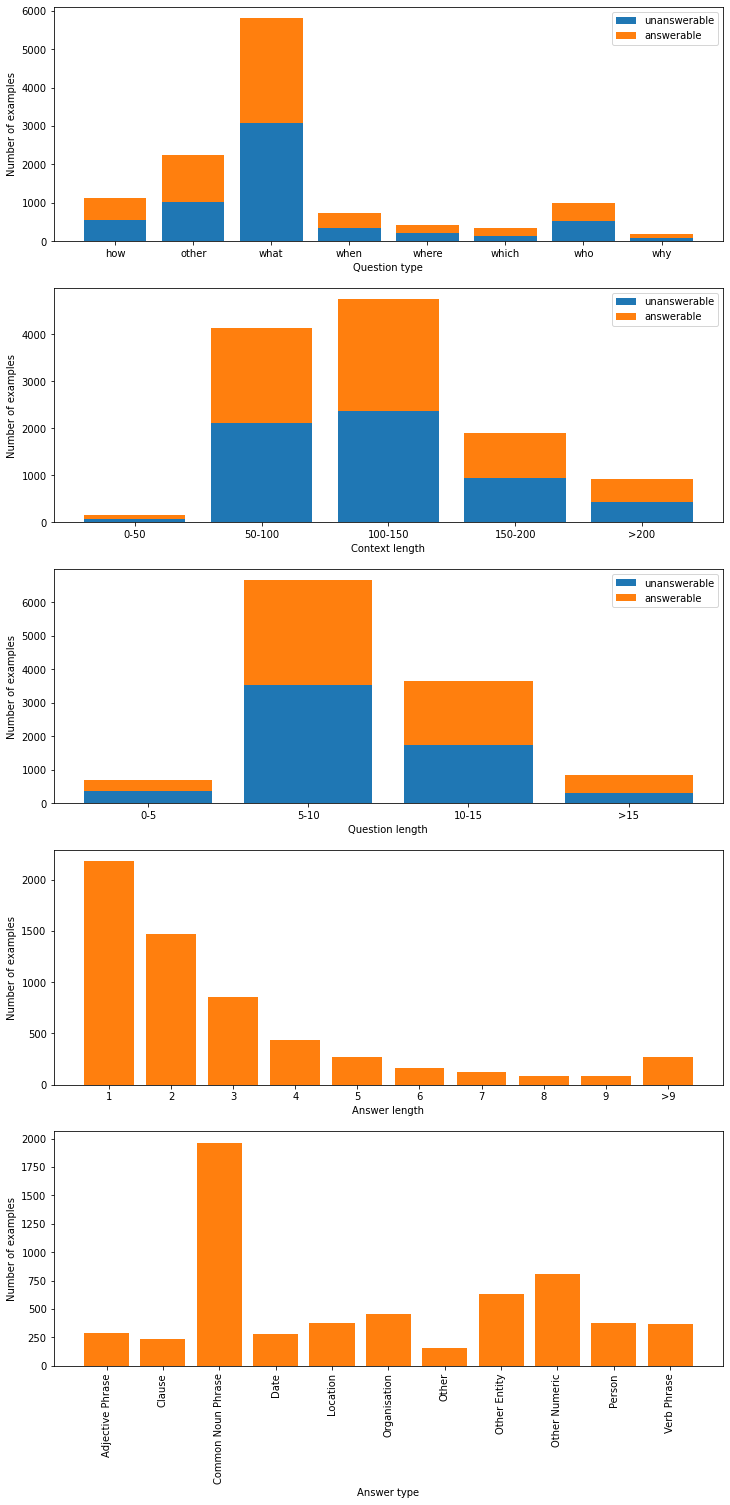

In [8]:
fig, axs = plt.subplots(5, figsize=(12,25))

for i, category in enumerate(['w6h_label', 'context_length_bin', 'question_length_bin', 'answer_length_bin', 'answer_type']):
    
    # Count number of unanswerable questions by category item
    unanswerable_count = squadv2_dev_categories.groupby(category).sum().reset_index()
    
    # Count number of answerable questions by category item
    answerable_count = (
        squadv2_dev_categories.groupby(category).count()['unanswerable'] - 
        squadv2_dev_categories.groupby(category).sum()['unanswerable']
    ).reset_index().rename(columns={'unanswerable': 'answerable'})
    
    count_df = unanswerable_count.merge(answerable_count, on=category)
    
    # Drop unanswerable questions for answer-related categories
    if category == 'answer_length_bin':
        count_df = count_df[count_df[category] != '0']
    elif category == 'answer_type':
        count_df = count_df[count_df[category] != 'UNANS']
    
    # Change ordering of bars
    if category == 'question_length_bin':
        count_df['order'] = count_df['question_length_bin'].map(
            {
                '0-5': 0,
                '5-10': 1,
                '10-15': 2,
                '>15': 3
            }
        )
        count_df.sort_values('order', inplace=True)
    
    if category == 'context_length_bin':
        count_df['order'] = count_df['context_length_bin'].map(
            {
                '0-50': 0,
                '50-100': 1,
                '100-150': 2,
                '150-200': 3,
                '>200': 4
            }
        )
        count_df.sort_values('order', inplace=True)
    
    
    if (category == 'answer_length_bin') | (category == 'answer_type'):
        pass
    else:
        assert count_df['unanswerable'].sum() + count_df['answerable'].sum() == squadv2_dev_categories.shape[0]

    axs[i].bar(count_df[category], count_df['unanswerable'], label='unanswerable')
    axs[i].bar(count_df[category], count_df['answerable'], bottom=count_df['unanswerable'], label='answerable')
    axs[i].set_xlabel(category_to_full_name[category])
    axs[i].set_ylabel('Number of examples')
    
    if (category == 'w6h_label') | (category == 'answer_type'):
        plt.xticks(rotation=90)
    
    if (category == 'answer_length_bin') | (category == 'answer_type'):
        pass
    else:
        axs[i].legend()

plt.show()

### SQuAD 2 train set

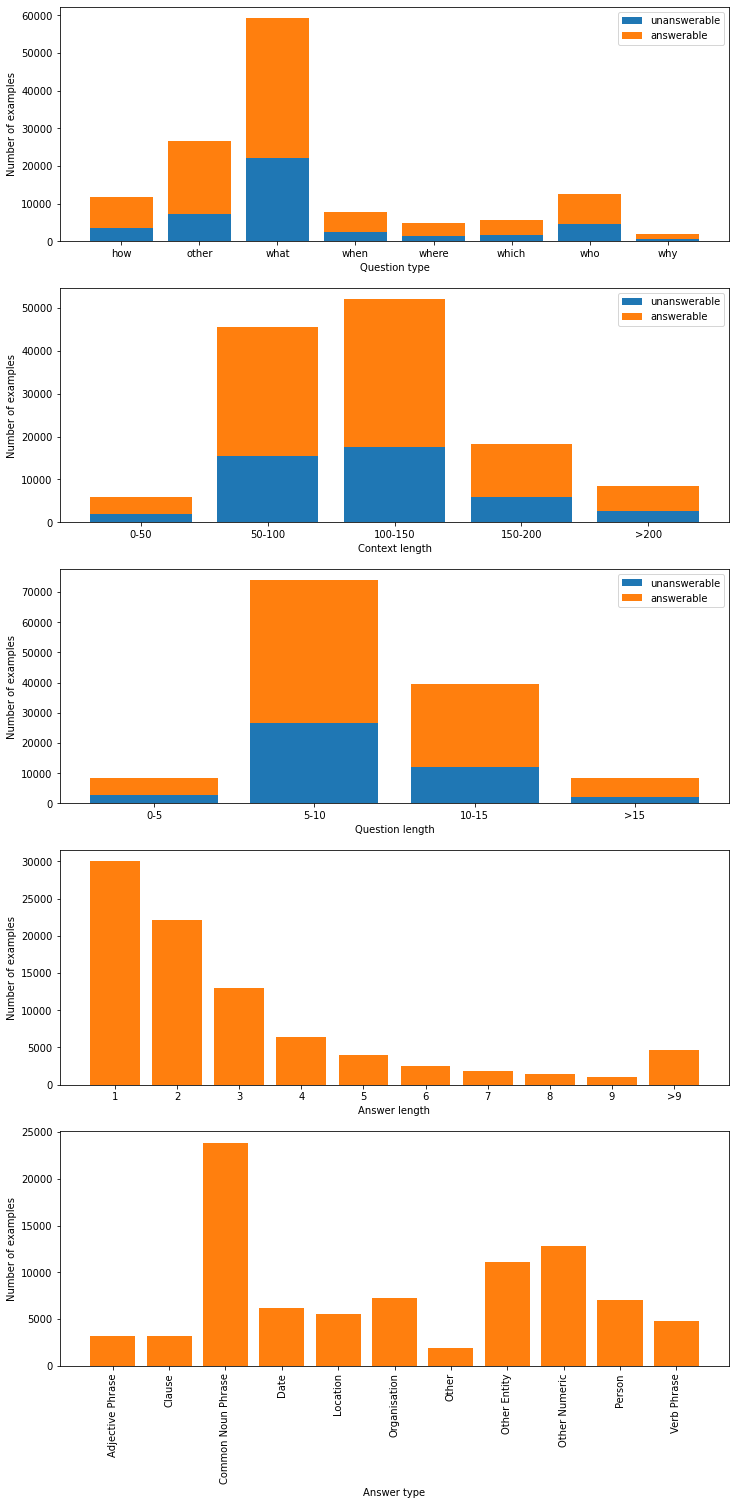

In [9]:
fig, axs = plt.subplots(5, figsize=(12,25))

for i, category in enumerate(['w6h_label', 'context_length_bin', 'question_length_bin', 'answer_length_bin', 'answer_type']):
    
    # Count number of unanswerable questions by category item
    unanswerable_count = squadv2_train_categories.groupby(category).sum().reset_index()
    
    # Count number of answerable questions by category item
    answerable_count = (
        squadv2_train_categories.groupby(category).count()['unanswerable'] - 
        squadv2_train_categories.groupby(category).sum()['unanswerable']
    ).reset_index().rename(columns={'unanswerable': 'answerable'})
    
    count_df = unanswerable_count.merge(answerable_count, on=category)
    
    # Drop unanswerable questions for answer-related categories
    if category == 'answer_length_bin':
        count_df = count_df[count_df[category] != '0']
    elif category == 'answer_type':
        count_df = count_df[count_df[category] != 'UNANS']
    
    # Change ordering of bars
    if category == 'question_length_bin':
        count_df['order'] = count_df['question_length_bin'].map(
            {
                '0-5': 0,
                '5-10': 1,
                '10-15': 2,
                '15-20': 3,
                '20-25': 4,
                '>25': 5
            }
        )
        count_df.sort_values('order', inplace=True)
    
    if category == 'context_length_bin':
        count_df['order'] = count_df['context_length_bin'].map(
            {
                '0-50': 0,
                '50-100': 1,
                '100-150': 2,
                '150-200': 3,
                '>200': 4
            }
        )
        count_df.sort_values('order', inplace=True)
    
    if (category == 'answer_length_bin') | (category == 'answer_type'):
        pass
    else:
        assert count_df['unanswerable'].sum() + count_df['answerable'].sum() == squadv2_train_categories.shape[0]

    axs[i].bar(count_df[category], count_df['unanswerable'], label='unanswerable')
    axs[i].bar(count_df[category], count_df['answerable'], bottom=count_df['unanswerable'], label='answerable')
    axs[i].set_xlabel(category_to_full_name[category])
    axs[i].set_ylabel('Number of examples')
    
    if (category == 'w6h_label') | (category == 'answer_type'):
        plt.xticks(rotation=90)
    
    if (category == 'answer_length_bin') | (category == 'answer_type'):
        pass
    else:
        axs[i].legend()

plt.show()

### SQuAD 1 train set

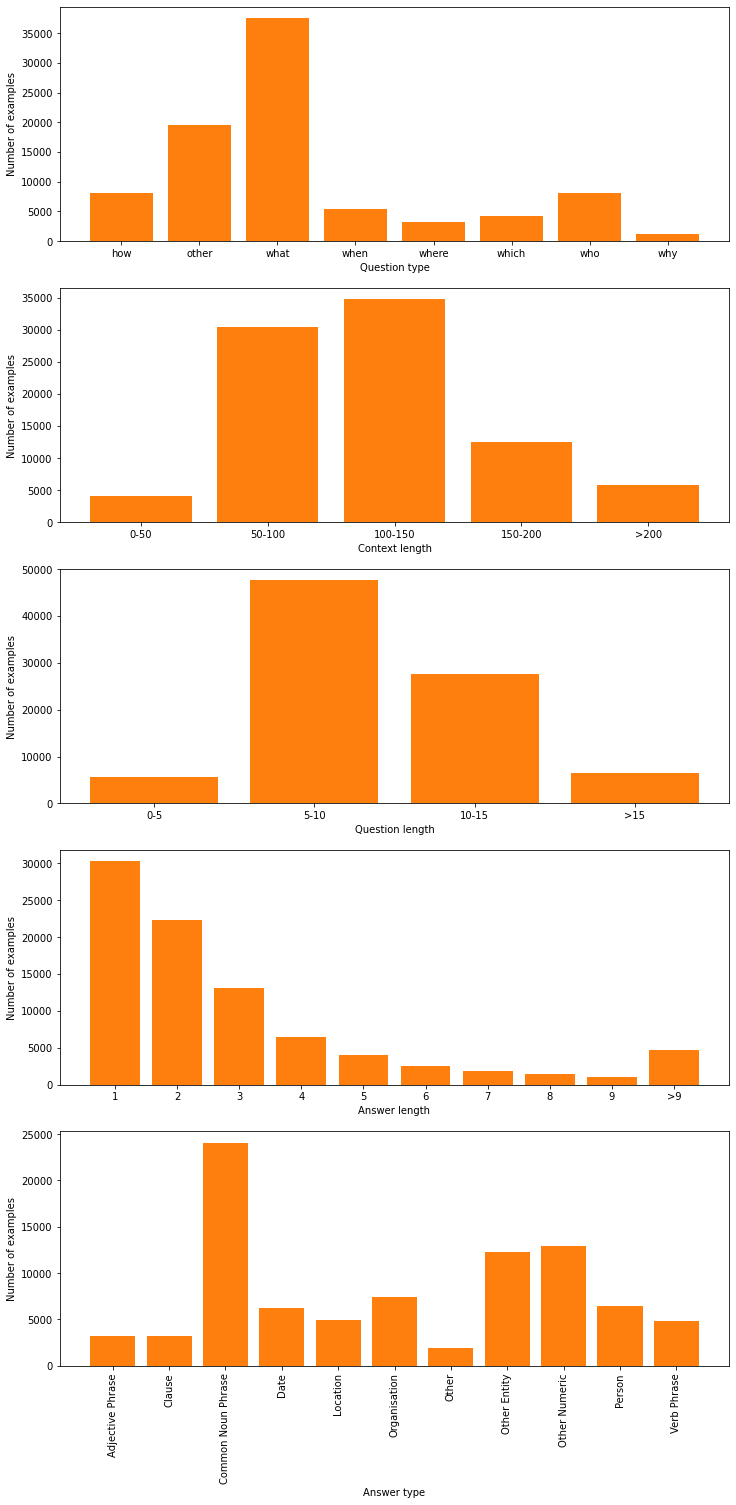

In [10]:
fig, axs = plt.subplots(5, figsize=(12,25))

for i, category in enumerate(['w6h_label', 'context_length_bin', 'question_length_bin', 'answer_length_bin', 'answer_type']):
    
    count_df = squadv1_train_categories.groupby(category).count().reset_index()[[category, 'id']]
    
    # Change ordering of bars
    if category == 'question_length_bin':
        count_df['order'] = count_df['question_length_bin'].map(
            {
                '0-5': 0,
                '5-10': 1,
                '10-15': 2,
                '15-20': 3,
                '20-25': 4,
                '>25': 5
            }
        )
        count_df.sort_values('order', inplace=True)
        
    if category == 'context_length_bin':
        count_df['order'] = count_df['context_length_bin'].map(
            {
                '0-50': 0,
                '50-100': 1,
                '100-150': 2,
                '150-200': 3,
                '>200': 4
            }
        )
        count_df.sort_values('order', inplace=True)

    axs[i].bar(count_df[category], count_df['id'], color='tab:orange')
    axs[i].set_xlabel(category_to_full_name[category])
    axs[i].set_ylabel('Number of examples')
    
    if (category == 'w6h_label') | (category == 'answer_type'):
        plt.xticks(rotation=90)

plt.show()

- Regenerate plot data